# Homework 4
In this homework we are working with a dataset of American universities, aggregated from government statistics. The dataset contains a large number of columns covering financial details, enrollment details, and so on. We will be using unsupervised dimensionality reduction to discover which features are highly related, and then using unsupervised clustering to discover which colleges are most similar.

# Initial Data Fetching and Setup

In [ ]:
!wget --no-check-certificate 'https://docs.google.com/uc?export=download&id=1lPoKPVXt9glGvBlxA-lwZDtmpyUsvIpL' -O colleges.csv


--2022-04-08 03:57:13--  https://docs.google.com/uc?export=download&id=1lPoKPVXt9glGvBlxA-lwZDtmpyUsvIpL
Resolving docs.google.com (docs.google.com)... 142.250.152.100, 142.250.152.113, 142.250.152.102, ...
Connecting to docs.google.com (docs.google.com)|142.250.152.100|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-04-b0-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/2u2o11ueu4m08u38eidvqt6jhuomjt8a/1649390175000/09640029349513786515/*/1lPoKPVXt9glGvBlxA-lwZDtmpyUsvIpL?e=download [following]
--2022-04-08 03:57:13--  https://doc-04-b0-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/2u2o11ueu4m08u38eidvqt6jhuomjt8a/1649390175000/09640029349513786515/*/1lPoKPVXt9glGvBlxA-lwZDtmpyUsvIpL?e=download
Resolving doc-04-b0-docs.googleusercontent.com (doc-04-b0-docs.googleusercontent.com)... 108.177.112.132, 2607:f8b0:4001:c12::84
Connecting to doc-04-b0-docs.googleusercontent.com (doc-04-b0-docs

In [ ]:
import pandas as pd
input_file = pd.read_csv("colleges.csv")
print(input_file.shape)

input_file_clean = {
    "Institution name": input_file["Institution name"]
}
for column in input_file.loc[:, input_file.columns[1:]]:
  clean_column = []
  original_column = input_file[column].replace("-", None)
  for x in original_column:
    try:
      clean_column.append(float(x))
    except:
      clean_column.append(None)
  input_file_clean[column] = clean_column
df = pd.DataFrame(input_file_clean)
df = df.dropna()



(3815, 77)


In [ ]:
import numpy as np


# Question 1 *(4 points)*

Manually choose four different subsets of features (select features which fall into the below categories), each of which represents one concept about the colleges in this list. You do not need to use a large number of features, just enough to represent (by hand) the concept you are trying to approximate.

| Feature Set | Description                                                               |
|-------------|---------------------------------------------------------------------------|
| Size        | Features representing the size of a university.                |
| Selectivity | Features representing the difficulty of being admitted and/or graduating. |
| Diversity   | Features representing the breadth of  representation in the student body.              |
| **You choose**   | One additional concept that you decide to investigate.             |

In [ ]:
df.columns

Index(['Institution name', 'Number of Applicants', 'Number Admitted',
       'Number Admitted who Enrolled', 'Percent of Applicants Admitted',
       'Percent Admitted who Enrolled', 'Undergraduate total_Full time - Men',
       'Undergraduate total_Full time - Women',
       'Undergraduate total_Full time - Total',
       'Undergraduate total_Part time - Men',
       'Undergraduate total_Part time - Women',
       'Undergraduate total_Part time - Total',
       'Undergraduate total_Grand Total', 'Graduate_Full time - Men',
       'Graduate_Full time - Women', 'Graduate_Full time - Total',
       'Graduate_Part time - Men', 'Graduate_Part time - Women',
       'Graduate_Part time - Total', 'Graduate_Grand Total',
       'All students total_Full time - Men',
       'All students total_Full time - Women',
       'All students total_Full time - Total',
       'All students total_Part time - Men',
       'All students total_Part time - Women',
       'All students total_Part time - Total',


## Answer 1 

**Size**

* 'Undergraduate_Total'
* 'Graduate_Total'


**Selectivity**

* 'Percent of Applicants Admitted'
* 'Graduation rate (%)'

**Diversity**

* 'Total_American Indian or Alaska Native '
* 'Total_Asian '
* 'Total_Black or African American '
* 'Total_Hispanic or Latino'
* 'Total_Native Hawaiian or Other Pacific Islander '
* 'Total_White '
* 'Total_Two or more races '
* 'Total_Race/ethnicity unknown '

**The Feature group you are creating**: Gender breakdown

* 'All students total_Full time - Men'
* 'All students total_Full time - Women'
* 'All students total_Part time - Men'
* 'All students total_Part time - Women'

# Task 2. *(14 points total)*

### Task 2.1 *(2 points)*
Normalize the features in the university dataset. Each feature in the resulting data frame should be normalized to a value between 0 and 1. Save this normalized representation to a variable named `df_norm`.

In [ ]:
df_numeric = df.drop(columns = "Institution name")

In [ ]:
from sklearn.preprocessing import MinMaxScaler

#Define data to use
X = df.loc[:, df_numeric.columns]


#Scale data
mms = MinMaxScaler()
df_norm = pd.DataFrame(mms.fit_transform(X), columns=df_numeric.columns, index = df['Institution name'])

In [ ]:
X.head()

,Number of Applicants,Number Admitted,Number Admitted who Enrolled,Percent of Applicants Admitted,Percent Admitted who Enrolled,Undergraduate total_Full time - Men,Undergraduate total_Full time - Women,Undergraduate total_Full time - Total,Undergraduate total_Part time - Men,Undergraduate total_Part time - Women,...,Graduate_Nonresident alien,Total_American Indian or Alaska Native,Total_Asian,Total_Black or African American,Total_Hispanic or Latino,Total_Native Hawaiian or Other Pacific Islander,Total_White,Total_Two or more races,Total_Race/ethnicity unknown,Total_Nonresident alien
1,7845.0,7226.0,2299.0,0.921,0.318,3988.0,6054.0,10042.0,1431.0,2363.0,...,701.0,59.0,1305.0,4795.0,672.0,6.0,12920.0,828.0,289.0,1049.0
2,4543.0,3674.0,1435.0,0.809,0.391,3678.0,2715.0,6393.0,743.0,535.0,...,270.0,97.0,364.0,946.0,458.0,6.0,6788.0,245.0,383.0,449.0
3,7783.0,7607.0,1038.0,0.977,0.136,1332.0,2311.0,3643.0,116.0,144.0,...,18.0,5.0,22.0,4017.0,43.0,2.0,171.0,44.0,51.0,58.0
4,37302.0,22032.0,6663.0,0.591,0.302,13333.0,16253.0,29586.0,1253.0,2189.0,...,543.0,139.0,466.0,4038.0,1831.0,42.0,29168.0,1242.0,240.0,1224.0
5,37302.0,22032.0,6663.0,0.591,0.302,351.0,391.0,742.0,415.0,524.0,...,543.0,5.0,9.0,340.0,40.0,0.0,1267.0,12.0,6.0,2.0


### Task 2.2 Unsupervised Features *(6 points)*
Using principal component analysis on `df_norm`, generate a dimensionality-reduced representation of the university dataset. 

2.2.1 Vary the number of components from 2 to 10. What percentage of variance is explained at each number of components?




In [ ]:
from sklearn.decomposition import PCA

for i in range(2, 11):
  pca = PCA(n_components = i)
  pca.fit_transform(df_norm)
  explained_variance = sum(pca.explained_variance_ratio_)
  print(f"Variance explained with {i} components: {round(100*explained_variance, 2)}%")

Variance explained with 2 components: 38.06%
Variance explained with 3 components: 49.04%
Variance explained with 4 components: 57.96%
Variance explained with 5 components: 64.51%
Variance explained with 6 components: 70.24%
Variance explained with 7 components: 75.61%
Variance explained with 8 components: 80.28%
Variance explained with 9 components: 83.2%
Variance explained with 10 components: 85.56%


2.2.2 Set the number of components to 4. Which features load together with high weight in each component? Make sure to explore each component individually.

In [ ]:
pca = PCA(n_components = 4)
components = pca.fit_transform(df_norm)

In [ ]:
#Exploring Component 1

factors = pd.DataFrame({
    "Features": df_norm.columns,
    "Component 1": pca.components_[0]
})
factors.sort_values("Component 1", ascending=False, ignore_index=True, inplace=True)

print(f"The top 3 in Component 1 are {factors.iloc[0, 0]}, {factors.iloc[1, 0]}, and {factors.iloc[2, 0]}.")

The top 3 in Component 1 are Number Admitted, Number Admitted who Enrolled, and Students submitting SAT scores - Number.


In [ ]:
#Exploring Component 2

factors = pd.DataFrame({
    "Features": df_norm.columns,
    "Component 2": pca.components_[1]
})
factors.sort_values("Component 2", ascending=False, ignore_index=True, inplace=True)

print(f"The top 3 in Component 2 are {factors.iloc[0, 0]}, {factors.iloc[1, 0]}, and {factors.iloc[2, 0]}.")

The top 3 in Component 2 are In-state - Percent, Students submitting SAT scores - Percent, and Percent of Applicants Admitted.


In [ ]:
#Exploring Component 3

factors = pd.DataFrame({
    "Features": df_norm.columns,
    "Component 3": pca.components_[2]
})
factors.sort_values("Component 3", ascending=False, ignore_index=True, inplace=True)

print(f"The top 3 in Component 3 are {factors.iloc[0, 0]}, {factors.iloc[1, 0]}, and {factors.iloc[2, 0]}.")

The top 3 in Component 3 are Percent Admitted who Enrolled, Undergraduate_Total, and Undergraduate total_Grand Total.


In [ ]:
#Exploring Component 4

factors = pd.DataFrame({
    "Features": df_norm.columns,
    "Component 4": pca.components_[3]
})
factors.sort_values("Component 4", ascending=False, ignore_index=True, inplace=True)

print(f"The top 3 in Component 4 are {factors.iloc[0, 0]}, {factors.iloc[1, 0]}, and {factors.iloc[2, 0]}.")

The top 3 in Component 4 are SAT I Math - 75th Percentile, Percent Admitted who Enrolled, and In-state - Percent.


### Task 2.3. Unsupervised Clusters (6 points) 
Tune a K-means cluster model on this dataset, using the features from `df_norm`. In particular, tune the number of clusters *K* to a level that, in your best judgment, produces representative clusters and appropriate complexity.


In [ ]:
#Form the dataframe on which to tune the model

condensed_df = pd.DataFrame(components, index=df['Institution name'])

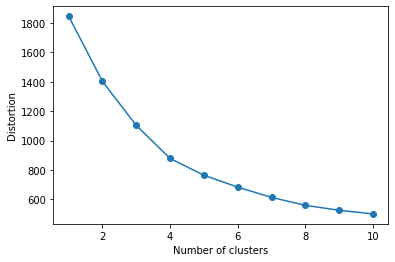

In [ ]:
#Use the elbow method to decide how many clusters is appropriate

import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

distortions = []
for i in range(1, 11):
    km = KMeans(n_clusters=i, 
                init='k-means++', 
                n_init=10, 
                max_iter=300,
                tol=0.0001, 
                random_state=0)
    km.fit(condensed_df)
    distortions.append(km.inertia_)
plt.plot(range(1, 11), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()

In [ ]:
#Fitting the model
km = KMeans(n_clusters=4, 
                init='k-means++', 
                n_init=10, 
                max_iter=300,
                tol=0.0001, 
                random_state=0)
km_predict = km.fit_predict(condensed_df)

In [ ]:
df["Cluster_Prediction"] = km_predict

In [ ]:
#Calculate cluster statistics to see how they are differentiated from each other

for i in range(0, 4):
  df_i = df.loc[df["Cluster_Prediction"] == i]
  print(f"Cluster {i+1} stats:")
  print(f"Percentage of all data: {round(100*len(df_i)/len(df), 2)}%")
  print(f"Average percent of applicants admitted: {round(100*np.mean(df_i['Percent of Applicants Admitted']), 2)}")
  print(f"Average total number of undergrads: {round(np.mean(df_i['Undergraduate_Total']), 2)}")
  print(f"Average 75th percentile marker for SAT I Math: {round(np.mean(df_i['SAT I Math - 75th Percentile']), 2)}")
  print(f"Average percent of in-state students: {round(100*np.mean(df_i['In-state - Percent']), 2)}")
  print()

Cluster 1 stats:
Percentage of all data: 28.05%
Average percent of applicants admitted: 69.42
Average total number of undergrads: 3024.26
Average 75th percentile marker for SAT I Math: 591.71
Average percent of in-state students: 84.61

Cluster 2 stats:
Percentage of all data: 46.07%
Average percent of applicants admitted: 68.14
Average total number of undergrads: 3602.86
Average 75th percentile marker for SAT I Math: 604.8
Average percent of in-state students: 90.3

Cluster 3 stats:
Percentage of all data: 6.27%
Average percent of applicants admitted: 58.54
Average total number of undergrads: 23400.57
Average 75th percentile marker for SAT I Math: 676.32
Average percent of in-state students: 75.05

Cluster 4 stats:
Percentage of all data: 19.61%
Average percent of applicants admitted: 61.25
Average total number of undergrads: 2105.45
Average 75th percentile marker for SAT I Math: 642.2
Average percent of in-state students: 40.81



## Question 3 *(6 points)*

**3.1) What number of clusters did you choose, and what was your evaluation process for choosing that value?**
*I used the elbow method to plot the distortion for different numbers of clusters. There was a slight bend in the graph ("elbow") at k=4, so this is the value I chose.*


**3.2) Do the sets of features you chose manually align with the principal components** and/**or clusters you discovered?**
*The manual selections did not overlap very much with the principal components. The only features that appeared both in the manual selections and in one of the top 3 features contributing to a component were Undergraduate_Total and Percent of Applicants Admitted, which is related to size and selectivity. It seems like the number of undergrads is a big separating factor between clusters, as indicated by the cluster statistics; math SAT scores are as well.*


**3.3) What additional features, not present in this data, would be useful to group together similar universities using unsupervised learning?**
*The employment outcomes of graduates would be a useful feature; this could be how many graduates find a job in their chosen field within a year of graduation, and/or the average starting salary of graduates' first post-graduation job. Percent of students living on-campus vs. commuting would also help speak to the campus culture.*

